## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

## Loading the CSV file

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\Assignment 4\Multiple CSV/5.outlier.csv",header=None) 
df.head() 

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [4]:
# Checking whether target variable is imbalanced or not
df[2].value_counts()   

0    300
1    300
Name: 2, dtype: int64

## Identifying the Input and Output Features

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2] 

## Spliting the data into train and test

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

### Standardising input features

In [7]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)   

### Build the Logical Structure 

In [8]:
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  

In [9]:
model=Sequential()
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),))

In [10]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model 

In [11]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=10,validation_split=0.1) 

Epoch 1/10
44/44 [==============================] - 1s 11ms/step - loss: 0.5872 - accuracy: 0.9653 - val_loss: 0.5269 - val_accuracy: 0.9583
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.9190 - val_loss: 0.4395 - val_accuracy: 0.9583
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: 0.4231 - accuracy: 0.9190 - val_loss: 0.3703 - val_accuracy: 0.9583
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 0.3647 - accuracy: 0.9190 - val_loss: 0.3157 - val_accuracy: 0.9583
Epoch 5/10
44/44 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.9236 - val_loss: 0.2723 - val_accuracy: 0.9583
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.9421 - val_loss: 0.2374 - val_accuracy: 0.9583
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.9583 - val_loss: 0.2089 - val_accuracy: 0.9583
Epoch 8/10
44/44 [=

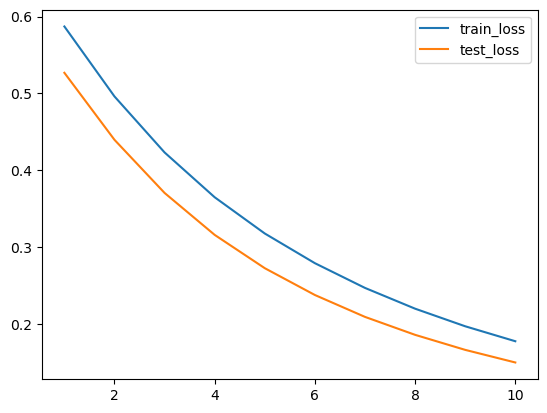

In [12]:
plt.plot(range(1,11),history.history["loss"],label="train_loss")
plt.plot(range(1,11),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [13]:
predicted=model.predict(x_test)
predicted=np.where(predicted>0.5,1,0)
predicted

4/4 [==============================] - 0s 3ms/step


array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

## Evaluating the model 

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))  

1.0


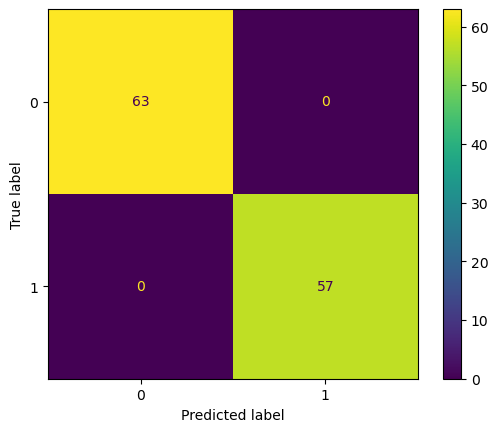

In [15]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

### PLOTING THE DECISION SURFACE 

In [16]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 24s 2ms/step


<AxesSubplot:>

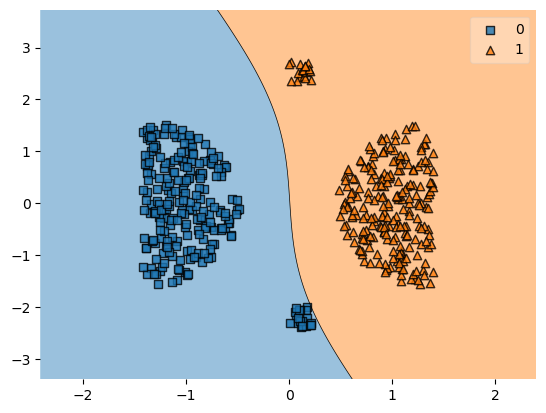

In [17]:
plot_decision_regions(x_train,y_train.values,clf=model)  

9600/9600 [==============================] - 28s 3ms/step


<AxesSubplot:>

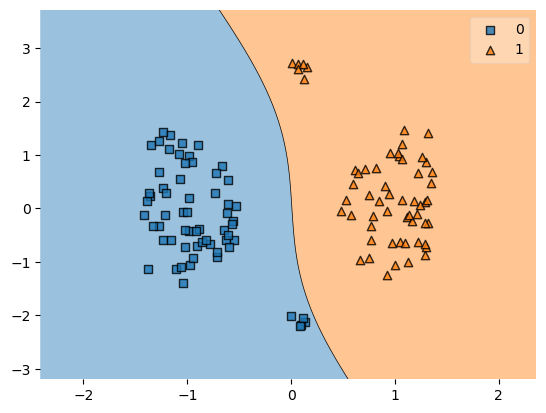

In [18]:
plot_decision_regions(x_test,y_test.values,clf=model)  

## **Conclusions:**
- This neural network model achieves an accuracy of 100%.                      
#### The model architecture consists of 2 hidden layers as following:

- In the first hidden layer, there are 18 neurons with the tanh activation function 
- In the second hidden layer, there are 16 neurons with the tanh activation function 

- The output layer uses the sigmoid activation function.

 
#### Overall, this neural network model architecture and training configuration achieve an accuracy of 100%.  

